In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import seaborn as sns


In [64]:
#read the file
df1= pd.read_csv('Documents/GitHub/IF/data.csv')
df1.head()

,date,CNY,ZA,CHF,JPY,USD TO,CNY TO,ZA TO,CHF TO,JPY TO,...,USD tot,CNY tnt,ZA tnt,CHF tnt,JPY tnt,USD tnt,CNY nfa,ZA nfa,CHF nfa,JPY nfa
0,4-Jan,8.28,6.93,1.24,106.48,0.018991,0.155518,0.112978,0.182694,0.060531,...,1.055785,0.959459,0.903187,0.992303,0.951446,0.923723,0.019634,-0.005604,0.101181,0.026993
1,4-Feb,8.28,6.77,1.24,106.55,0.019552,0.173791,0.123553,0.197181,0.062438,...,1.058788,0.970922,0.906163,0.992006,0.953512,0.923310,0.019634,-0.005604,0.101181,0.026993
2,4-Mar,8.28,6.64,1.28,108.62,0.020094,0.221002,0.141914,0.227796,0.076555,...,1.058556,0.973295,0.901913,0.993889,0.953608,0.923854,0.019634,-0.005604,0.101181,0.026993
3,4-Apr,8.28,6.56,1.30,107.25,0.019944,0.222297,0.136795,0.204015,0.071361,...,1.063627,0.978012,0.908809,0.990508,0.956701,0.931846,0.019121,-0.014133,0.101861,0.027576
4,4-May,8.28,6.79,1.28,112.35,0.020147,0.194379,0.138205,0.186367,0.066312,...,1.052013,0.978698,0.910850,0.990748,0.955716,0.939221,0.019121,-0.014133,0.101861,0.027576


In [65]:
# choose the data started from 2007-02 and stop on 2018-06
df=df1.drop(range(0, 37),)
df.to_csv('C:\\Users\\Angel\\Documents\\GitHub\\IF\\newdata.csv',sep=',')
df=pd.read_csv('C:\\Users\\Angel\\Documents\\GitHub\\IF\\newdata.csv')
df=df.iloc[:137, 1:]
df.head()


,date,CNY,ZA,CHF,JPY,USD TO,CNY TO,ZA TO,CHF TO,JPY TO,...,USD tot,CNY tnt,ZA tnt,CHF tnt,JPY tnt,USD tnt,CNY nfa,ZA nfa,CHF nfa,JPY nfa
0,7-Feb,7.75,7.17,1.24,120.45,0.022279,0.184524,0.156641,0.220458,0.088510,...,1.027975,1.004013,0.993803,1.011551,1.007261,0.991670,0.045397,-0.088698,0.112059,0.031747
1,7-Mar,7.74,7.35,1.22,117.28,0.023089,0.217070,0.176128,0.252445,0.102046,...,1.019118,1.010500,1.002075,1.012849,1.004137,0.997451,0.045397,-0.088698,0.112059,0.031747
2,7-Apr,7.72,7.12,1.21,118.83,0.022811,0.230439,0.162478,0.220921,0.093913,...,1.009623,1.019027,1.009303,1.008496,1.010309,1.003305,0.048586,-0.095974,0.112575,0.032114
3,7-May,7.67,7.02,1.22,120.73,0.023013,0.204929,0.176713,0.241660,0.096689,...,1.002863,1.021423,1.018314,1.014282,1.009250,1.008266,0.048586,-0.095974,0.112575,0.032114
4,7-Jun,7.63,7.17,1.23,122.62,0.023133,0.212815,0.175452,0.241184,0.101050,...,0.995454,1.021731,1.033646,1.013798,1.012358,1.009219,0.048586,-0.095974,0.112575,0.032114


In [66]:

# describe the data
df.describe()

,CNY,ZA,CHF,JPY,USD TO,CNY TO,ZA TO,CHF TO,JPY TO,USD PMI,...,USD tot,CNY tnt,ZA tnt,CHF tnt,JPY tnt,USD tnt,CNY nfa,ZA nfa,CHF nfa,JPY nfa
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,6.606934,9.931825,0.997664,100.889197,0.023740,0.148240,0.166965,0.258644,0.092731,52.816788,...,0.998311,0.931056,1.090514,0.985733,1.010421,1.002393,0.045746,-0.145655,0.097557,0.030258
std,0.405935,2.664483,0.093441,13.900001,0.001729,0.032706,0.019546,0.045219,0.010789,5.248929,...,0.031560,0.078714,0.066601,0.025015,0.022300,0.025801,0.009771,0.016457,0.004249,0.002138
min,6.100000,6.700000,0.780000,76.770000,0.019337,0.082851,0.118153,0.171324,0.056192,33.100000,...,0.892476,0.783453,0.961065,0.941437,0.956175,0.956126,0.029831,-0.165285,0.092550,0.027129
25%,6.300000,7.600000,0.940000,90.290000,0.022437,0.119854,0.154210,0.219659,0.086557,50.800000,...,0.980989,0.852701,1.018596,0.956353,0.997936,0.989097,0.037068,-0.157901,0.095461,0.028103
50%,6.560000,9.180000,0.970000,102.130000,0.023549,0.145372,0.165935,0.257943,0.093542,53.000000,...,0.995530,0.953135,1.134978,0.990106,1.013528,0.999888,0.045473,-0.146286,0.096866,0.030005
75%,6.830000,12.090000,1.040000,112.340000,0.025204,0.169366,0.178138,0.292126,0.100954,56.500000,...,1.026417,1.002772,1.145675,1.002698,1.026667,1.006810,0.055715,-0.137957,0.097584,0.032272
max,7.750000,16.390000,1.240000,123.750000,0.026837,0.230439,0.230570,0.408002,0.117965,60.800000,...,1.062587,1.058705,1.158477,1.035381,1.071573,1.130300,0.061744,-0.088698,0.112575,0.033481


In [67]:
# operate on the Chinese data firstly. take log on each variable(keep M2YoY unchanged )
df['lJPY'] = np.log(df['JPY'])
#df['lJPY TO'] = np.log(df[['JPY TO']])
df['lJPY TO'] = np.log(df[['JPY TO']])
df['lJPY PMI'] = np.log(df[['JPY PMI']])
df['lJPY tot']=np.log(df['JPY tot']/df['USD tot'])
df['lJPY tnt']=np.log(df['JPY tnt']/df['USD tnt'])
# take ADF test on these 4 variables to check its stableness
print(ts.adfuller(df['lJPY']))
print(ts.adfuller(df['lJPY TO']))
print(ts.adfuller(df['lJPY PMI']))
print(ts.adfuller(df['JPY M2YoY']))
print(ts.adfuller(df['lJPY tot']))
print(ts.adfuller(df['lJPY tnt']))
print(ts.adfuller(df['JPY nfa']))
# raw data not stable under 1% significant level


(-1.482420532034928, 0.5421890357387164, 1, 135, {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}, -579.8880306472474)
(-3.582839812611479, 0.006097696450132341, 12, 124, {'1%': -3.484219653271961, '5%': -2.885145235641637, '10%': -2.579359138917794}, -382.70895662465136)
(-3.081144424088633, 0.027980420791766256, 4, 132, {'1%': -3.4808880719210005, '5%': -2.8836966192225284, '10%': -2.5785857598714417}, -420.1108665142672)
(-1.8045966140026841, 0.37818200222763737, 12, 124, {'1%': -3.484219653271961, '5%': -2.885145235641637, '10%': -2.579359138917794}, -44.04937054732957)
(-0.967647382263119, 0.7648805738228175, 13, 123, {'1%': -3.4846672514209773, '5%': -2.8853397507076006, '10%': -2.5794629869786503}, -351.17535218256614)
(-2.954115514538237, 0.03940733450194202, 5, 131, {'1%': -3.481281802271349, '5%': -2.883867891664528, '10%': -2.5786771965503177}, -898.3202006051479)
(-2.1774331151211945, 0.21453763598882913, 12, 124, {'1%': -3.484219653271961, '5%

In [68]:

# take first-order and conduct ADF test
df['difflJPY'] = df['lJPY'].diff(periods = 1)
df['difflJPY TO'] = df['lJPY TO'].diff(periods = 1)
df['difflJPY PMI'] = df['lJPY PMI'].diff(periods = 1)
df['diffJPY M2YoY'] = df['JPY M2YoY'].diff(periods = 1)
df['difflJPY tot'] = df['lJPY tot'].diff(periods = 1)
df['difflJPY tnt'] = df['lJPY tnt'].diff(periods = 1)
df['diffJPY nfa'] = df['JPY nfa'].diff(periods = 1)

print(ts.adfuller(df['difflJPY'].drop(0,)))
print(ts.adfuller(df['difflJPY TO'].drop(0,)))
print(ts.adfuller(df['difflJPY PMI'].drop(0,)))
print(ts.adfuller(df['diffJPY M2YoY'].drop(0,)))
print(ts.adfuller(df['difflJPY tot'].drop(0,)))
print(ts.adfuller(df['difflJPY tnt'].drop(0,)))
print(ts.adfuller(df['diffJPY nfa'].drop(0,)))

(-8.504476136679365, 1.2133166214734588e-13, 0, 135, {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}, -577.4010866968904)
(-3.4199474610813247, 0.010297371175388767, 13, 122, {'1%': -3.4851223522012855, '5%': -2.88553750045158, '10%': -2.5795685622144586}, -370.0891974944782)
(-7.230019091016854, 2.0059844165809232e-10, 5, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -409.2858427507755)
(-5.419870702281729, 3.0764522718175484e-06, 11, 124, {'1%': -3.484219653271961, '5%': -2.885145235641637, '10%': -2.579359138917794}, -53.55461775702764)
(-2.8788088231922546, 0.04786832041941067, 12, 123, {'1%': -3.4846672514209773, '5%': -2.8853397507076006, '10%': -2.5794629869786503}, -348.121356083563)
(-5.432710657995497, 2.8905888940680075e-06, 5, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -882.348151706543)
(-2.3561223883992284, 0.15450527316966894, 11, 124, {'1%': -3.484219653

In [69]:
df['lJPY_1'] = 0
size_sample = 136

for i in range(size_sample):
    df.loc[i,'lJPY_1'] = df.loc[i+1,'difflJPY']
    
df.loc[size_sample,'lJPY_1'] = df.loc[0,'difflJPY']


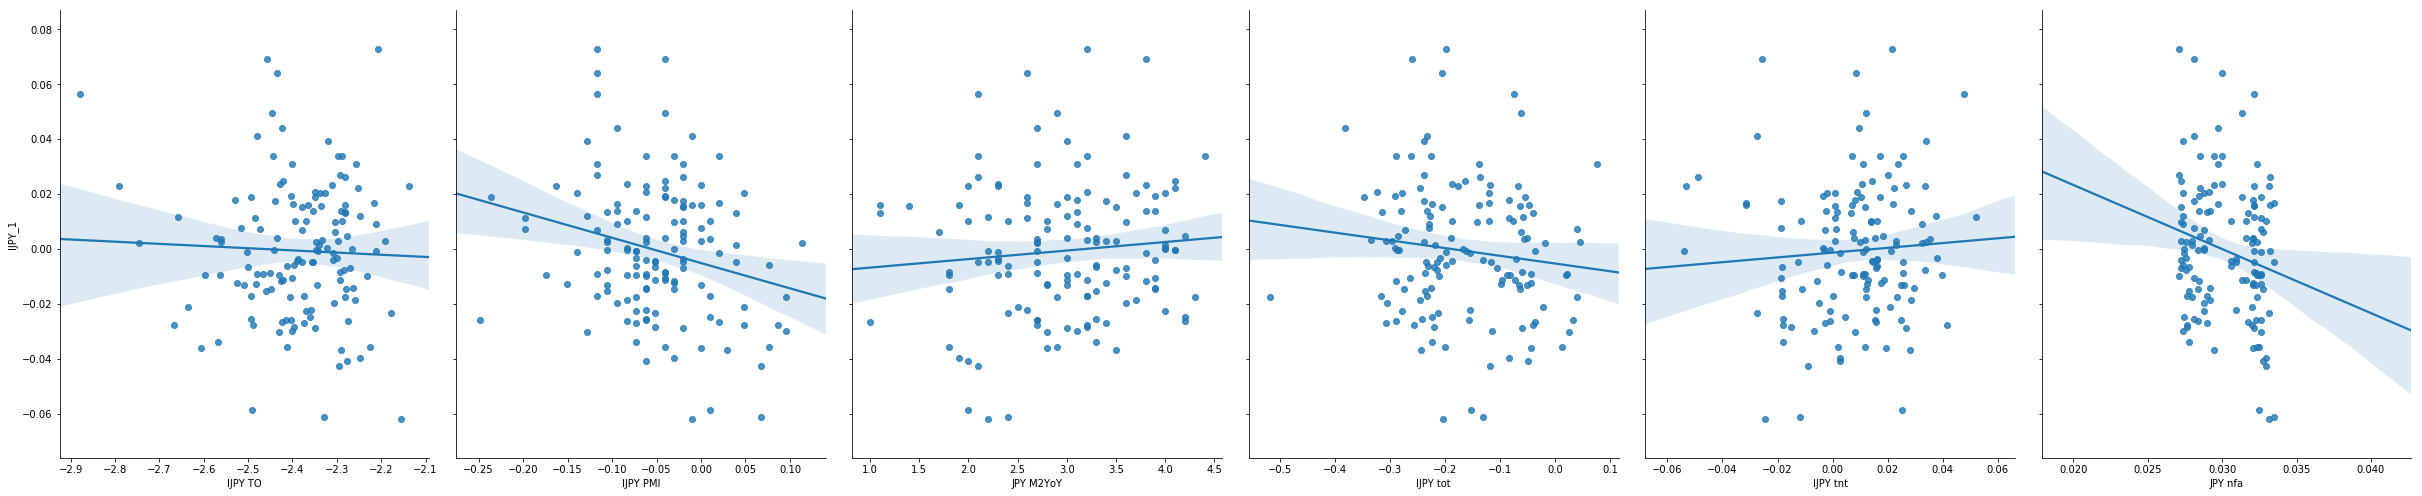

In [70]:
# check relation
sns.pairplot(df, x_vars=['lJPY TO','lJPY PMI','JPY M2YoY','lJPY tot','lJPY tnt','JPY nfa'], y_vars='lJPY_1', size=7, aspect=0.8, kind='reg')  
plt.show()

In [71]:
# run regression with whole data
df['const'] = 1 # create column of constant

reg_int = sm.OLS(endog=df['lJPY_1'], exog=df[['const', 'lJPY TO','lJPY PMI','JPY M2YoY','lJPY tot','lJPY tnt','JPY nfa']], missing='drop')
results = reg_int.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                 lJPY_1   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     2.974
Date:                Wed, 07 Nov 2018   Prob (F-statistic):            0.00941
Time:                        22:57:35   Log-Likelihood:                 321.08
No. Observations:                 136   AIC:                            -628.2
Df Residuals:                     129   BIC:                            -607.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0936      0.070      1.333      0.1

In [72]:

#results.resid
print(ts.adfuller(results.resid))



(-9.124279257269244, 3.1442420617493358e-15, 0, 135, {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}, -587.0206670662368)


In [73]:
# Now we do it recursively with window length=60
size_sample = 137
size_subsample = 60

fcst_beer60 = np.zeros(size_sample - size_subsample)
fcst_error_beer60 = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):

    reg_beersub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lJPY_1'], exog=df.loc[df.index[i:size_subsample+i],['const', 'lJPY TO','lJPY PMI','JPY M2YoY','lJPY tot','lJPY tnt','JPY nfa']], missing='drop')
    results_sub = reg_beersub.fit()
    
    # error = results_sub.predict(exog = [1, erf.loc[size_subsample+i,'int_diff']]) - erf.loc[size_subsample+i, 'dep_1']
    
    fcst_beer60[i] = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lJPY TO','lJPY PMI','JPY M2YoY','lJPY tot','lJPY tnt','JPY nfa']]])
    error = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lJPY TO','lJPY PMI','JPY M2YoY','lJPY tot','lJPY tnt','JPY nfa']]]) - df.loc[size_subsample+i, 'lJPY_1']
    fcst_error_beer60[i] = error
    
fcst_error_beer60=np.where(np.isnan(fcst_error_beer60),0,fcst_error_beer60)
fcst_error_beer60
#fcst_beer

array([-0.04083599,  0.00843524,  0.04556356,  0.0227997 ,  0.01233262,
        0.01941899,  0.01854995, -0.00373016,  0.00050392, -0.00767916,
       -0.03385013, -0.00972606,  0.00832317, -0.03297148, -0.02761713,
        0.04608519, -0.01340972,  0.03975655,  0.00508154,  0.02880994,
       -0.00359497, -0.01137493,  0.0152249 ,  0.02774321,  0.02230978,
        0.01384621,  0.03365622,  0.01816651,  0.01194235, -0.00298207,
       -0.02637847,  0.00604557, -0.04139761,  0.01259821,  0.05713572,
        0.04339109,  0.01541951,  0.02659695,  0.00750224, -0.00640181,
        0.02049112,  0.01264032,  0.04149618,  0.01179858, -0.01055457,
        0.02315526,  0.04227031,  0.03992325,  0.03021325,  0.04308355,
        0.01331611,  0.04865558,  0.0234025 ,  0.02417695, -0.01984535,
       -0.02679158, -0.05238754, -0.06945619,  0.02209129,  0.02657288,
        0.01206974,  0.04316389, -0.01720947,  0.01321334, -0.00255267,
        0.03096818,  0.00323876, -0.0064677 ,  0.0105369 ,  0.00

In [74]:
# Now we do it recursively with window length=60
size_sample = 137
size_subsample = 30

fcst_beer30 = np.zeros(size_sample - size_subsample)
fcst_error_beer30 = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):

    reg_beersub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lJPY_1'], exog=df.loc[df.index[i:size_subsample+i],['const', 'lJPY TO','lJPY PMI','JPY M2YoY','lJPY tot','lJPY tnt','JPY nfa']], missing='drop')
    results_sub = reg_beersub.fit()
    
    # error = results_sub.predict(exog = [1, erf.loc[size_subsample+i,'int_diff']]) - erf.loc[size_subsample+i, 'dep_1']
    
    fcst_beer30[i] = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lJPY TO','lJPY PMI','JPY M2YoY','lJPY tot','lJPY tnt','JPY nfa']]])
    error = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lJPY TO','lJPY PMI','JPY M2YoY','lJPY tot','lJPY tnt','JPY nfa']]]) - df.loc[size_subsample+i, 'lJPY_1']
    fcst_error_beer30[i] = error
    
fcst_error_beer30=np.where(np.isnan(fcst_error_beer30),0,fcst_error_beer30)


In [75]:
# Now we do it recursively with window length=60
size_sample = 137
size_subsample = 90

fcst_beer90 = np.zeros(size_sample - size_subsample)
fcst_error_beer90 = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):

    reg_beersub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lJPY_1'], exog=df.loc[df.index[i:size_subsample+i],['const', 'lJPY TO','lJPY PMI','JPY M2YoY','lJPY tot','lJPY tnt','JPY nfa']], missing='drop')
    results_sub = reg_beersub.fit()
    
    # error = results_sub.predict(exog = [1, erf.loc[size_subsample+i,'int_diff']]) - erf.loc[size_subsample+i, 'dep_1']
    
    fcst_beer90[i] = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lJPY TO','lJPY PMI','JPY M2YoY','lJPY tot','lJPY tnt','JPY nfa']]])
    error = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lJPY TO','lJPY PMI','JPY M2YoY','lJPY tot','lJPY tnt','JPY nfa']]]) - df.loc[size_subsample+i, 'lJPY_1']
    fcst_error_beer90[i] = error
    
fcst_error_beer90=np.where(np.isnan(fcst_error_beer90),0,fcst_error_beer90)


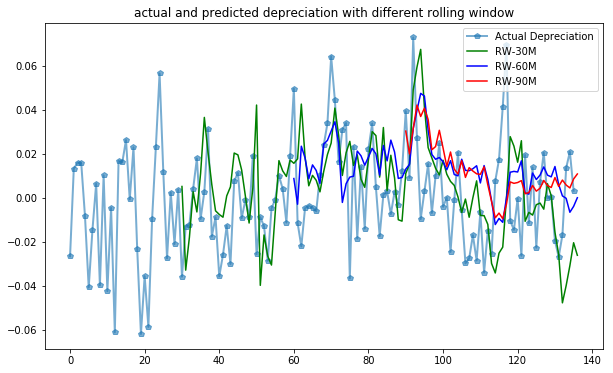

In [76]:
# Now we do it recursively with window length=60
size_sample = 137
size_subsample = 90

fcst_beer90 = np.zeros(size_sample - size_subsample)
fcst_error_beer90 = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):

    reg_beersub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lJPY_1'], exog=df.loc[df.index[i:size_subsample+i],['const', 'lJPY TO','lJPY PMI','JPY M2YoY','lJPY tot','lJPY tnt','JPY nfa']], missing='drop')
    results_sub = reg_beersub.fit()
    
    # error = results_sub.predict(exog = [1, erf.loc[size_subsample+i,'int_diff']]) - erf.loc[size_subsample+i, 'dep_1']
    
    fcst_beer90[i] = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lJPY TO','lJPY PMI','JPY M2YoY','lJPY tot','lJPY tnt','JPY nfa']]])
    error = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lJPY TO','lJPY PMI','JPY M2YoY','lJPY tot','lJPY tnt','JPY nfa']]]) - df.loc[size_subsample+i, 'lJPY_1']
    fcst_error_beer90[i] = error
    
fcst_error_beer90=np.where(np.isnan(fcst_error_beer90),0,fcst_error_beer90)


# In[55]:



#改变rolling window 长度
df_d = df.set_index('date')
fig, ax = plt.subplots(figsize = (10, 6))

y = df['lJPY_1']
ax.plot(y, 'p-', linewidth=2, label='Actual Depreciation', alpha=0.6)

v1=np.append(np.zeros(30),fcst_beer30)
v1[v1==0]=None
ax.plot(v1, 'g-',label = 'RW-30M')
ax.legend()

v2=np.append(np.zeros(60),fcst_beer60)
v2[v2==0]=None
ax.plot(v2, 'b-',label = 'RW-60M')
ax.legend()

v3=np.append(np.zeros(90),fcst_beer90)
v3[v3==0]=None
ax.plot(v3, 'r-',label = 'RW-90M')
ax.legend()

ax.set_title('actual and predicted depreciation with different rolling window') 

plt.show()

In [77]:
# Compute RMSE for the Beer model
rmse_beer60 = np.sqrt(np.mean(fcst_error_beer60**2))
rmse_beer60


0.02683232857412323

In [78]:
rmse_rw = np.sqrt(np.mean(df.loc[size_subsample: size_sample-1, 'lJPY_1']**2))
rmse_rw


0.023906691739711345

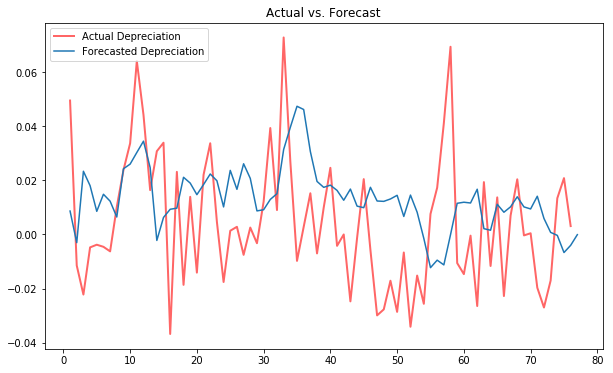

In [79]:
df_d = df.set_index('date')
size_subsample=60
fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(77)
x = x.cumsum()
# size_subsample no need to +1
#x=df.loc[size_subsample: size_sample,'date']
yB1 = df.loc[size_subsample: size_sample, 'lJPY_1']
ax.plot(x, yB1, 'r-', linewidth=2, label=r'Actual Depreciation', alpha=0.6)

yB2 = fcst_beer60
ax.plot(x, yB2, label = 'Forecasted Depreciation')
ax.legend()

ax.set_title('Actual vs. Forecast') 


plt.show()


In [80]:
#比值偏离度
devB1=(yB1-yB2)/yB2
devB1.describe()

count     76.000000
mean     -11.545394
std       85.107247
min     -741.778686
25%       -2.413110
50%       -1.232366
75%        0.033173
max       16.539949
Name: lJPY_1, dtype: float64

In [81]:

devB2=yB1-yB2
devB2.describe()


count    76.000000
mean     -0.008969
std       0.025645
min      -0.057136
25%      -0.026579
50%      -0.012465
75%       0.006629
max       0.069456
Name: lJPY_1, dtype: float64

In [82]:
#homework replicate
dfhw1 = pd.read_csv('Documents/GitHub/IF/data-HW.csv')
dfhw1.head()

,date,CNY,ZA,CHF,JPY,C_IBR,ZA_IBR,CHF_IBR,JPY_IBR,U_IBR,...,C_PMI,ZA_PMI,CHF_PMI,JPY_PMI,U_PMI,C_REER,ZA_REER,CHF_REER,JPY_REER,U_REER
0,7-Jan,7.7898,7.19,1.24,120.58,1.94,8.70,2.12,0.43,5.10,...,55.1,50.6,62.4,NaN,49.5,88.38,92.23,98.5578,84.74,108.91
1,7-Feb,7.7546,7.17,1.24,120.45,1.91,8.66,2.13,0.59,5.11,...,53.1,57.8,64.4,53.0,51.9,89.59,91.48,98.7527,83.20,108.37
2,7-Mar,7.7391,7.35,1.22,117.28,1.95,8.28,2.24,0.56,5.02,...,56.1,59.1,61.5,52.5,50.7,88.16,88.88,98.8296,85.50,108.65
3,7-Apr,7.7247,7.12,1.21,118.83,2.05,8.28,2.30,0.58,4.84,...,58.6,54.0,61.8,52.3,52.6,87.07,91.24,99.9483,83.44,107.55
4,7-May,7.6704,7.02,1.22,120.73,2.08,8.50,2.36,0.58,4.71,...,55.7,55.5,60.4,51.4,52.5,87.66,92.23,100.1821,81.45,106.82


In [83]:
# choose the data started from 2007-02 and stop on 2018-06
dfhw=dfhw1.drop(range(0, 1),)
dfhw.to_csv('C:\\Users\\Angel\\Documents\\GitHub\\IF\\newdata1.csv',sep=',')
dfhw=pd.read_csv('C:\\Users\\Angel\\Documents\\GitHub\\IF\\newdata1.csv')
dfhw=dfhw.iloc[:137, 1:]
dfhw.tail()


,date,CNY,ZA,CHF,JPY,C_IBR,ZA_IBR,CHF_IBR,JPY_IBR,U_IBR,...,C_PMI,ZA_PMI,CHF_PMI,JPY_PMI,U_PMI,C_REER,ZA_REER,CHF_REER,JPY_REER,U_REER
132,18-Feb,6.3162,11.82,0.93,107.82,3.24,7.12,-0.86,-0.18,1.66,...,50.3,52.3,65.5,54.1,60.8,127.61,85.87,101.0719,74.40,110.55
133,18-Mar,6.3220,11.84,0.95,106.00,3.11,7.06,-0.79,-0.14,1.72,...,51.5,48.3,60.3,53.1,59.3,125.87,86.03,101.4584,75.77,111.43
134,18-Apr,6.2975,12.09,0.97,107.43,2.72,6.98,-0.80,-0.12,1.81,...,51.4,48.8,63.6,53.8,57.3,126.34,85.02,101.6703,74.66,111.85
135,18-May,6.3758,12.53,1.00,109.69,2.77,7.01,-0.90,-0.13,1.92,...,51.9,49.8,62.4,52.8,58.7,127.26,84.02,102.0573,74.51,115.38
136,18-Jun,6.4556,13.30,0.99,110.03,3.01,7.03,-0.84,-0.12,1.92,...,51.5,44.8,61.8,53.0,60.2,126.42,80.35,102.0615,74.95,117.31


In [84]:
# compute the change in the exchange rate: take log and first difference to compute depreciation (dep)
dfhw['lJPY'] = np.log(dfhw[['JPY']])
dfhw['lJPY_1'] = dfhw['lJPY'].diff(periods = 1)


In [85]:

# Create a new column to reindex depreciation - why?
dfhw['lJPY_1'] = 0
size_sample = 136

for i in range(size_sample):
    dfhw.loc[i,'lJPY_1'] = dfhw.loc[i+1,'lJPY']
    dfhw.loc[size_sample,'lJPY_1'] = dfhw.loc[0,'lJPY']


In [87]:
#Next we compute the independent variable: interest differential across US and China.
dfhw['int_diff'] = dfhw['JPY_IBR'] - dfhw['U_IBR']



In [89]:

# the pattern is not that clear so we run the regression
dfhw['const'] = 1 # create column of constant

reg_int = sm.OLS(endog=df['lJPY_1'], exog=dfhw[['const', 'int_diff']], missing='drop')
results = reg_int.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 lJPY_1   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.711
Date:                Wed, 07 Nov 2018   Prob (F-statistic):              0.193
Time:                        23:00:45   Log-Likelihood:                 313.13
No. Observations:                 136   AIC:                            -622.3
Df Residuals:                     134   BIC:                            -616.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.002      0.330      0.7

In [90]:
# Now we do rolling window to forecast through UIP model
size_sample = 137
size_subsample = 60

# How many regressions can we run? How many forecast errors can we compute?
fcst_int = np.zeros(size_sample - size_subsample)
fcst_error_int = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):
    reg_intsub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lJPY_1'], exog=dfhw.loc[dfhw.index[i:size_subsample+i],['const', 'int_diff']], missing='drop')
    results_sub = reg_intsub.fit()
    
    fcst_int[i] = results_sub.predict(exog = [dfhw.loc[size_subsample+i,['const', 'int_diff']]])
    error = results_sub.predict(exog = [1, dfhw.loc[size_subsample+i,'int_diff']]) - df.loc[size_subsample+i, 'lJPY_1']
    fcst_error_int[i] = error

fcst_error_int=np.where(np.isnan(fcst_error_int),0,fcst_error_int)    
fcst_error_int


array([-5.61898028e-02,  5.83582688e-03,  1.66247336e-02, -8.60797780e-04,
       -1.58465037e-03, -7.24023065e-04,  7.66091275e-04, -1.56261967e-02,
       -2.88402263e-02, -3.84338775e-02, -6.77648793e-02, -4.71966642e-02,
       -1.85924543e-02, -3.23650826e-02, -3.54719347e-02,  3.57511726e-02,
       -2.45401345e-02,  1.76992022e-02, -1.41253629e-02,  1.29926609e-02,
       -2.28486427e-02, -3.08645352e-02, -3.48479854e-03,  2.04717756e-02,
       -6.30673261e-04, -3.43691275e-03,  8.68295790e-03, -2.29220332e-03,
        2.59851115e-03, -1.14079807e-02, -3.88648672e-02, -6.49858441e-03,
       -6.96798697e-02, -2.56061833e-02,  1.34740623e-02,  5.30200321e-04,
       -1.09286121e-02,  1.15238300e-02, -6.19824295e-03, -2.00459117e-02,
        8.62108348e-03,  6.50218253e-03,  3.12269320e-02,  7.57318247e-03,
       -1.03702979e-02,  2.34028896e-02,  3.92937694e-02,  2.18665087e-02,
       -1.98374511e-06,  1.81427863e-02, -1.76322975e-02,  6.67679249e-03,
       -1.22380242e-02,  

In [91]:
#Now we do the same to obtain forecast errors made by the Taylor-rule model:
# Taylor-Rule model

# inflation differential
dfhw['pi_diff'] = dfhw['JPY_CPI'] - dfhw['U_CPI']

fcst_tr = np.zeros(size_sample - size_subsample)
fcst_error_tr = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):
    # Create a column to store the output gap difference and update it in each loop
    y_JPY = dfhw['JPY_PMI'] - np.mean(dfhw.loc[i:size_subsample-1+i, 'JPY_PMI'])
    y_U = dfhw['U_PMI'] - np.mean(dfhw.loc[i:size_subsample-1+i, 'U_PMI'])
    dfhw['y_diff'] = y_JPY - y_U
    
    reg_trsub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lJPY_1'], exog=dfhw.loc[dfhw.index[i:size_subsample+i],['const', 'pi_diff','y_diff']], missing='drop')
    results_sub = reg_trsub.fit()
    
    # error = results_sub.predict(exog = [1, erf.loc[size_subsample+i,'int_diff']]) - erf.loc[size_subsample+i, 'dep_1']
    
    fcst_tr[i] = results_sub.predict(exog = [dfhw.loc[size_subsample+i,['const', 'pi_diff','y_diff']]])
    error = results_sub.predict(exog = [dfhw.loc[size_subsample+i,['const', 'pi_diff','y_diff']]]) - df.loc[size_subsample+i, 'lJPY_1']
    fcst_error_tr[i] = error
    
fcst_error_tr=np.where(np.isnan(fcst_error_tr),0,fcst_error_tr)
fcst_error_tr


array([-0.05739807,  0.00464452,  0.01627175, -0.00271166, -0.0059832 ,
       -0.0026607 ,  0.00077018, -0.01431628, -0.02764336, -0.03883867,
       -0.06471189, -0.04465956, -0.01611994, -0.0346017 , -0.04101835,
        0.03017317, -0.02929977,  0.01935471, -0.01366299,  0.0141148 ,
       -0.02479586, -0.03516989, -0.00081287,  0.01690536, -0.00089219,
       -0.00355704,  0.00956028, -0.00011391,  0.00482302, -0.00951249,
       -0.0355147 , -0.00064405, -0.06420518, -0.01340289,  0.02404233,
        0.01228686, -0.00262503,  0.02004596, -0.00147285, -0.01696305,
        0.01291111,  0.00710891,  0.03085318,  0.00566701, -0.01817992,
        0.0069023 ,  0.02901291,  0.02206735,  0.01711627,  0.03468388,
        0.01117229,  0.04351513,  0.02867331,  0.03374788, -0.00990548,
       -0.01556443, -0.04052222, -0.0640146 ,  0.01839291,  0.02667663,
        0.01440741,  0.03860571, -0.01524509,  0.01636258,  0.00027107,
        0.0337643 ,  0.00920538, -0.00110154,  0.01486603,  0.00

In [92]:

# compute RMSE for the interest differential model
rmse_int = np.sqrt(np.mean(fcst_error_int**2))
rmse_int

0.02595676087093021

In [93]:
# Compute RMSE for the Taylor rule model
rmse_tr = np.sqrt(np.mean(fcst_error_tr**2))
rmse_tr


0.025452913128888824

In [94]:
rmse_rw = np.sqrt(np.mean(df.loc[size_subsample: size_sample-1, 'lJPY_1']**2))
rmse_rw

0.02419915992312485

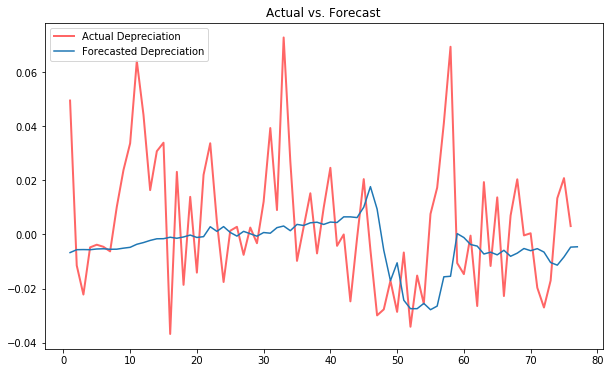

In [95]:
#实际值和UIP model值比较
dfhw_d = dfhw.set_index('date')

fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(77)
x = x.cumsum()

yU1= df.loc[size_subsample: size_sample, 'lJPY_1']
ax.plot(x, yU1, 'r-', linewidth=2, label=r'Actual Depreciation', alpha=0.6)

yU2= fcst_int
ax.plot(x, yU2, label = 'Forecasted Depreciation')
ax.legend()

ax.set_title('Actual vs. Forecast') 


plt.show()


In [96]:
#比值偏离度
devU1=(yU1-yU2)/yU2
devU1.describe()


count    76.000000
mean     -0.643615
std      15.776952
min     -62.983318
25%      -3.746765
50%      -0.803274
75%       2.621468
max      83.729460
Name: lJPY_1, dtype: float64

In [97]:
#差值偏离度
devU2=yU1-yU2
devU2.describe()


count    76.000000
mean      0.008447
std       0.024888
min      -0.039294
25%      -0.008637
50%       0.003461
75%       0.024590
max       0.084817
Name: lJPY_1, dtype: float64

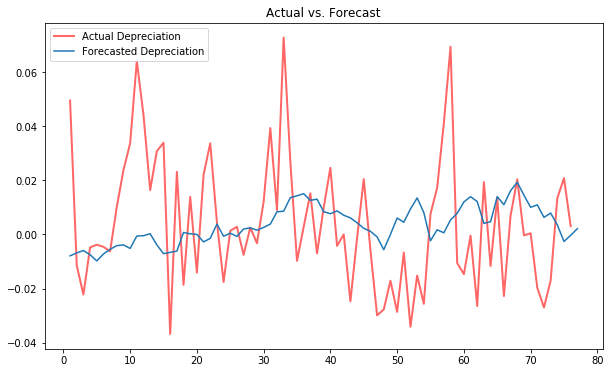

In [98]:
#实际值和泰勒值比较
dfhw_d = dfhw.set_index('date')

fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(77)
x = x.cumsum()

yT1 = df.loc[size_subsample: size_sample, 'lJPY_1']
ax.plot(x, yT1, 'r-', linewidth=2, label=r'Actual Depreciation', alpha=0.6)

yT2 = fcst_tr
ax.plot(x, yT2, label = 'Forecasted Depreciation')
ax.legend()

ax.set_title('Actual vs. Forecast') 


plt.show()


In [99]:
#比值偏离度
devT1=(yT1-yT2)/yT2
devT1.describe()


count      76.000000
mean      -34.249174
std       206.908778
min     -1512.506164
25%        -4.788589
50%        -1.395597
75%         0.756948
max        65.819307
Name: lJPY_1, dtype: float64

In [100]:

devT2=yT1-yT2
devT2.describe()

count    76.000000
mean      0.001015
std       0.025770
min      -0.043515
25%      -0.016958
50%      -0.000079
75%       0.015325
max       0.064712
Name: lJPY_1, dtype: float64

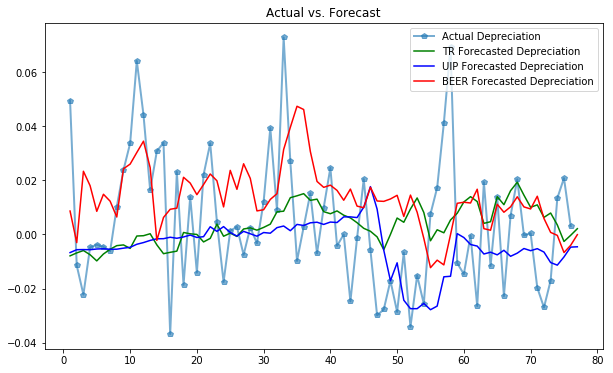

In [101]:
#预测线叠加
dfhw_d = dfhw.set_index('date')

fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(77)
x = x.cumsum()

y1 = df.loc[size_subsample: size_sample, 'lJPY_1']
ax.plot(x, y1, 'p-', linewidth=2, label='Actual Depreciation', alpha=0.6)


ax.plot(x, yT2, 'g-',label = 'TR Forecasted Depreciation')
ax.legend()


ax.plot(x, yU2, 'b-',label = 'UIP Forecasted Depreciation')
ax.legend()


ax.plot(x, yB2, 'r-',label = 'BEER Forecasted Depreciation')
ax.legend()

ax.set_title('Actual vs. Forecast') 


plt.show()

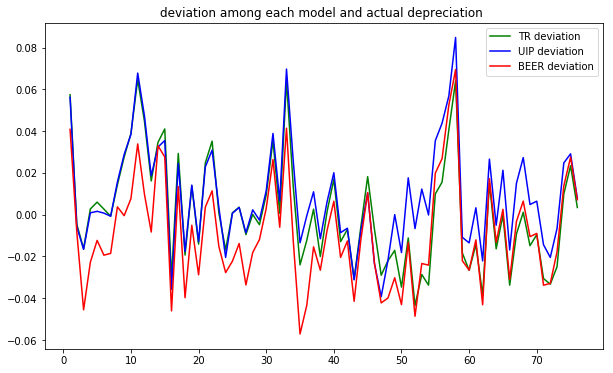

In [102]:

fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(77)
x = x.cumsum()

ax.plot(x, devT2, 'g-',label = 'TR deviation')
ax.legend()


ax.plot(x, devU2, 'b-',label = 'UIP deviation')
ax.legend()


ax.plot(x, devB2, 'r-',label = 'BEER deviation')
ax.legend()

ax.set_title('deviation among each model and actual depreciation ') 

plt.show()